<img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/>

# Dropout #
By Richard Sowers
* <r-sowers@illinois.edu>
* <https://publish.illinois.edu/r-sowers/>

Copyright 2020 University of Illinois Board of Trustees. All Rights Reserved.

# imports and graphics configurations

In [ ]:
import os
import numpy
import pandas
import time
import random
import matplotlib
#%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.stats
#from pandas.plotting import autocorrelation_plot
import matplotlib.offsetbox as offsetbox
from matplotlib.ticker import StrMethodFormatter
from matplotlib.backends.backend_agg import FigureCanvasAgg
import graphviz
import itertools

import imageio
import PIL

def saver(fname):
    plt.savefig(fname+".png",bbox_inches="tight")

def legend(pos="bottom",ncol=3):
    if pos=="bottom":
        plt.legend(bbox_to_anchor=(0.5,-0.2), loc='upper center',facecolor="lightgray",ncol=ncol)
    elif pos=="side":
        plt.legend(bbox_to_anchor=(1.1,0.5), loc='center left',facecolor="lightgray",ncol=1)

def textbox(txt,fname=None):
    plt.figure(figsize=(1,1))
    plt.gca().add_artist(offsetbox.AnchoredText("\n".join(txt), loc="center",prop=dict(size=30)))
    plt.axis('off')
    if fname is not None:
        saver(fname)
    plt.show()
    plt.close()

In [ ]:
#for some reason, this needs to be in a separate cell
params={
    "font.size":15,
    "lines.linewidth":5,
}
plt.rcParams.update(params)

In [ ]:
pngfiles=[f for f in os.listdir(".") if f.endswith(".png")]
print("existing png files: "+str(pngfiles))
print([os.remove(f) for f in pngfiles])

existing png files: ['Dropout.gv.png']
[None]


# configuration variables

In [ ]:
N_samples=20
plot_color="blue"
ref_color="red"
SEED=0

# main

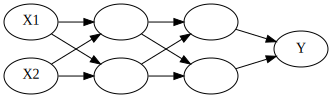

In [ ]:
g = graphviz.Digraph(name="Dropout",format="png")
g.attr(rankdir='LR')
indices=[[1,2],[1,2],[1,2],[1]]
labels=["<X<sub>{0:}</sub>>","","","Y"]
for (layer,label) in zip(range(len(indices)),labels):
    for index in indices[layer]:
        g.node("y{0:}{1:}".format(layer,index),label=label.format(index))
for n in range(1,len(indices)):
    for indexminus,indexplus in itertools.product(indices[n-1],indices[n]):
        g.edge("y{0:}{1:}".format(n-1,indexminus),"y{0:}{1:}".format(n,indexplus))
g

In [ ]:
g.render()

'Dropout.gv.png'